In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools

sns.set_style("darkgrid")

def flatten(t):
    return [item for sublist in t for item in sublist]

pd.set_option('max_columns', None)

In [2]:
results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
#results_complete = results_complete[results_complete['i_net_nas'] == True]
results_complete_columns = list(results_complete.columns)

results_summary = pd.read_csv('./results_summary.csv', delimiter=';')
#results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)

results_summary.head(5)

,function_family_maximum_depth,function_family_beta,function_family_decision_sparsity,function_family_fully_grown,function_family_dt_type,function_family_basic_function_representation_length,function_family_function_representation_length,data_number_of_variables,data_num_classes,data_categorical_indices,data_dt_type_train,data_maximum_depth_train,data_decision_sparsity_train,data_function_generation_type,data_objective,data_x_max,data_x_min,data_x_distrib,data_lambda_dataset_size,data_noise_injected_level,data_noise_injected_type,lambda_net_epochs_lambda,lambda_net_early_stopping_lambda,lambda_net_early_stopping_min_delta_lambda,lambda_net_batch_lambda,lambda_net_dropout_lambda,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,lambda_net_loss_lambda,lambda_net_number_of_lambda_weights,lambda_net_number_initializations_lambda,lambda_net_number_of_trained_lambda_nets,i_net_dense_layers,i_net_convolution_layers,i_net_lstm_layers,i_net_dropout,i_net_optimizer,i_net_learning_rate,i_net_loss,i_net_metrics,i_net_epochs,i_net_early_stopping,i_net_batch_size,i_net_interpretation_dataset_size,i_net_test_size,i_net_function_representation_type,i_net_normalize_lambda_nets,i_net_optimize_decision_function,i_net_function_value_loss,i_net_soft_labels,i_net_data_reshape_version,i_net_nas,i_net_nas_type,i_net_nas_trials,evaluation_random_evaluation_dataset_size,evaluation_per_network_optimization_dataset_size,evaluation_sklearn_dt_benchmark,evaluation_sdt_benchmark,evaluation_different_eval_data,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_lambda_dataset_size,evaluation_eval_data_description_eval_data_noise_injected_level,evaluation_eval_data_description_eval_data_noise_injected_type,evaluation_eval_data_description_eval_data_number_of_trained_lambda_nets,evaluation_eval_data_description_eval_data_interpretation_dataset_size,computation_load_model,computation_n_jobs,computation_use_gpu,computation_gpu_numbers,computation_RANDOM_SEED,train_dt_scores_soft_binary_crossentropy,train_dt_scores_soft_binary_crossentropy_median,train_dt_scores_soft_binary_crossentropy_data_random,train_dt_scores_soft_binary_crossentropy_data_random_median,train_dt_scores_binary_crossentropy,train_dt_scores_binary_crossentropy_median,train_dt_scores_binary_crossentropy_data_random,train_dt_scores_binary_crossentropy_data_random_median,train_dt_scores_accuracy,train_dt_scores_accuracy_median,train_dt_scores_accuracy_data_random,train_dt_scores_accuracy_data_random_median,train_dt_scores_f1_score,train_dt_scores_f1_score_median,train_dt_scores_f1_score_data_random,train_dt_scores_f1_score_data_random_median,train_dt_scores_runtime,train_dt_scores_runtime_median,train_inet_scores_soft_binary_crossentropy,train_inet_scores_soft_binary_crossentropy_median,train_inet_scores_binary_crossentropy,train_inet_scores_binary_crossentropy_median,train_inet_scores_accuracy,train_inet_scores_accuracy_median,train_inet_scores_f1_score,train_inet_scores_f1_score_median,train_inet_scores_runtime,train_inet_scores_runtime_median,valid_dt_scores_soft_binary_crossentropy,valid_dt_scores_soft_binary_crossentropy_median,valid_dt_scores_soft_binary_crossentropy_data_random,valid_dt_scores_soft_binary_crossentropy_data_random_median,valid_dt_scores_binary_crossentropy,valid_dt_scores_binary_crossentropy_median,valid_dt_scores_binary_crossentropy_data_random,valid_dt_scores_binary_crossentropy_data_random_median,valid_dt_scores_accuracy,valid_dt_scores_accuracy_median,valid_dt_scores_accuracy_data_random,valid_dt_scores_accuracy_data_random_median,valid_dt_scores_f1_score,valid_dt_scores_f1_score_median,valid_dt_scores_f1_score_data_random,valid_dt_scores_f1_score_data_random_median,valid_dt_scores_runtime,valid_dt_scores_runtime_median,valid_inet_scores_soft_binary_crossentropy,valid_inet_scores_soft_binary_crossentropy_median,valid_inet_scores_binary_crossentropy,valid_inet_scores_binary_crossentropy_median,valid_inet

In [3]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_maximum_depth_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_function_generation_type',
                  'data_categorical_indices',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_learning_rate',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'i_net_nas',
                  'i_net_nas_trials',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [4]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_inet_scores' for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])

    
print(results_summary_inet.shape)
results_summary_inet

(54, 128)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,vanilla1_inet_scores,3,1,vanilla,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,0.616474,0.615307,0.569003,0.567067,0.703344,0.7024,0.664482,0.695851,0.000763,0.000763,0.619904,0.617766,0.574994,0.573605,0.702496,0.7152,0.673612,0.713898,0.000886,0.000886

In [5]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores' for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled.head(5)


(54, 128)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,vanilla1_dt_scores,3,1,vanilla,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,0.519338,0.521510,0.415607,0.424973,0.812544,0.8076,0.804334,0.803337,0.019770,0.019261,0.515391,0.512567,0.408172,0.409819,0.818256,0.8260,0.814105,0.817887,0.021446,0.020898,0

In [6]:
columns_dt_distilled_random_data = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'runtime' not in column:
            if 'data_random' in column:
                columns_dt_distilled_random_data.append(column)
        else: 
            columns_dt_distilled_random_data.append(column)
results_summary_dt_distilled_random_data = results_summary[flatten([colmuns_identifier, columns_dt_distilled_random_data])]

columns_dt_distilled_random_data_rename = []
for column in columns_dt_distilled_random_data:
    column = column.replace('dt_scores_','')
    column = column.replace('_data_random','')
    columns_dt_distilled_random_data_rename.append(column)

results_summary_dt_distilled_random_data.columns = flatten([colmuns_identifier, columns_dt_distilled_random_data_rename])

#results_summary_dt_distilled_random_data.insert(0, 'scores_type', 'dt_scores_data_random')
results_summary_dt_distilled_random_data.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores_data_random' for dt_type, decision_sparsity in zip(results_summary_dt_distilled_random_data['function_family_dt_type'].values, results_summary_dt_distilled_random_data['function_family_decision_sparsity'].values)])


print(results_summary_dt_distilled_random_data.shape)
results_summary_dt_distilled_random_data.head(5)

(54, 128)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,vanilla1_dt_scores_data_random,3,1,vanilla,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,0.513757,0.516722,0.395052,0.407307,0.823310,0.8212,0.814989,0.819453,0.019770,0.019261,0.510315,0.509515,0.389243,0.390487,0.827992,0.8328,0.824589,0.829977,0.02144

In [7]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                     #results_summary_dt_distilled_random_data
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced.head(5)

,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,vanilla1_inet_scores,3,1,vanilla,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,0.616474,0.615307,0.569003,0.567067,0.703344,0.7024,0.664482,0.695851,0.000763,0.000763,0.619904,0.617766,0.574994,0.573605,0.702496,0.7152,0.673612,0.713898,0.000886,0.000886

In [8]:
colmuns_identifier.append('scores_type')
not_considered_random_dataset_sizes = ['1000', '100000', '1000000']

In [9]:
def get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False):
    
    results_summary_reduced_metric_columns = []
    for column in results_summary_reduced_columns:  
        if metric in column:
            if 'soft' not in column and not soft:           
                if 'median' not in column:
                    tokens = column.split('_')
                    integer = [token for token in tokens if token.isdigit()]
                    if len(integer) > 0:
                        integer = integer[0]
                        if integer not in not_considered_random_dataset_sizes:                    
                            results_summary_reduced_metric_columns.append(column)
                    else:
                        if 'TRAIN_DATA' not in column:
                            results_summary_reduced_metric_columns.append(column)

    results_summary_reduced_metric_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_metric_columns])
    results_summary_reduced_metric_with_identifier = results_summary_reduced[results_summary_reduced_metric_with_identifier_columns]
    results_summary_reduced_metric_with_identifier.head(5)    
    
    
    results_summary_reduced_metric_plot = results_summary_reduced_metric_with_identifier

    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_nas'] == config['nas']]
    except:
        pass
    
    if config['nas'] == True:
        try:
            results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_nas_trials'] == config['nas_trials']]
        except:
            pass    
    else:
        try:
            results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_dense_layers'] == config['inet_structure']]
        except:
            pass
    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_loss'] == config['loss']]
    except:
        pass
    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_noise_injected_level'] == config['noise_injected_level']]
    except:
        pass
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_categorical_indices'] == config['categorical_indices']]
    except:
        pass    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_data_reshape_version'] == config['data_reshape_version']]
    except:
        pass
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_function_generation_type'] == config['function_generation_type']]
    except:
        pass        
        
    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_number_of_variables'].isin(config['number_of_variables'])]
    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['function_family_maximum_depth'].isin(config['maximum_depth'])]

    results_summary_reduced_metric_plot_columns = list(results_summary_reduced_metric_plot.columns)
    result_columns = []
    identifier_columns = []
    for column in results_summary_reduced_metric_plot_columns:
        if metric in column:
            result_columns.append(column)
        else:
            identifier_columns.append(column)
    number_of_results = results_summary_reduced_metric_plot.shape[0]

    results_summary_reduced_metric_plot_single_column_identifier = pd.concat([results_summary_reduced_metric_plot[identifier_columns] for _ in range(len(result_columns))], axis=0)
    results_summary_reduced_metric_plot_single_column_identifier['result_identifier'] = flatten([[result_column]*number_of_results for result_column in result_columns])
    #results_summary_reduced_metric_plot_single_column_identifier['result_identifier'] = flatten([[i]*number_of_results for i in range(len(result_columns))])

    results_summary_reduced_metric_plot_single_column_results = pd.concat([results_summary_reduced_metric_plot[result_column] for result_column in result_columns], axis=0)
    results_summary_reduced_metric_plot_single_column_results.name = 'score'

    results_summary_reduced_metric_plot = pd.concat([results_summary_reduced_metric_plot_single_column_identifier, results_summary_reduced_metric_plot_single_column_results], axis=1)

    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot.sort_values(by=['function_family_dt_type', 'function_family_decision_sparsity'], ascending=(False, True))
    
    
    return results_summary_reduced_metric_plot
    

In [10]:
def plot_results(data_reduced, col, x, y, hue, plot_type=sns.barplot):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=2,
                      aspect=1.5,
                      ##legend_out=False,
                     )
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

In [11]:
figsize = (20, 10)
font_scale = 2.5

legend_fontsize = 25
legend_loc = 2

color_1 = '#84b7e9'#'#c0d6ff'
color_2 = '#0a6fd3'#'#96bcff'
color_3 = '#06427e'#'#6ca1ff'

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


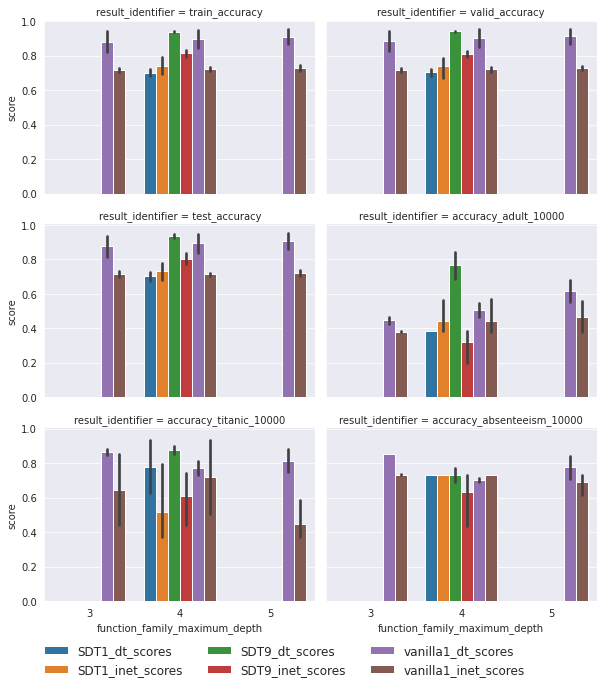

In [12]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    #'categorical_indices': '[]',#'[0, 1, 2, 3]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': False, # 'True', 'False'
    'nas_trials': 20, #20, 100

    'number_of_variables': [9], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [13]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_titanic_10000') &
                                      #(results_summary_reduced_accuracy_plot['scores_type'] == 'vanilla1_inet_scores') & 
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) &
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(20)

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
1,4,1,vanilla,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.932961
4,4,1,vanilla,vanilla,5,9,0,make_classification_trained,"[0, 1, 2, 3]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.631285
7,4,1,vanilla,vanilla,5,9,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.932961
10,4,1,vanilla,vanilla,5,9,0,random_decision_tree_trained,"[0, 1, 2, 3]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.379888
35,4,1,SDT,vanilla,5,9,0,random_decision_tree_trained,"[0, 1, 2, 3]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.374302
36,4,1,SDT,vanilla,5,9,0,make_classification_trained,"[0, 1, 2, 3]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.385475
42,4,1,SDT,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.374302
46,4,1,SDT,vanilla,5,9,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.932961
41,4,9,SDT,vanilla,5,9,0,make_classification_trained,"[0, 1, 2, 3]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,1,None,False,100,make_classification,0,SDT9_inet_scores,accuracy_titanic_10000,0.653631
43,4,9,SDT,vanilla,5,9,0,random_decision_tree_trained,"[0, 1, 2, 3]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,1,None,False,100,make_classification,0,SDT9_inet_scores,accuracy_titanic_10000,0.620112


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


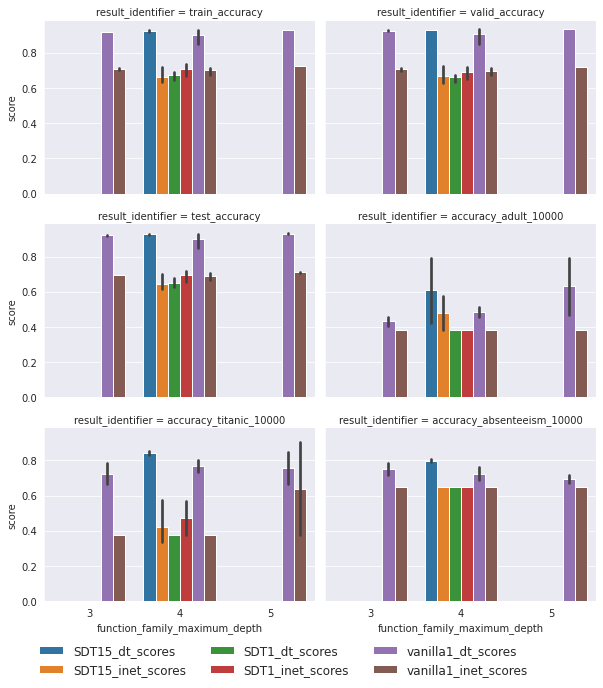

In [14]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    #'categorical_indices': '[]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': False, # 'True', 'False'
    'nas_trials': 20, #20, 100

    'number_of_variables': [15], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [15]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_absenteeism_10000') &
                                      #(results_summary_reduced_accuracy_plot['scores_type'] == 'vanilla1_inet_scores') & 
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) &
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(20)

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
12,4,1,vanilla,vanilla,5,15,0,random_decision_tree_trained,"[0, 1, 2, 9]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.374302
13,4,1,vanilla,vanilla,5,15,0,random_decision_tree_trained,"[0, 1, 2, 9]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.374302
18,4,1,vanilla,vanilla,5,15,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.374302
19,4,1,vanilla,vanilla,5,15,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.374302
51,4,1,vanilla,vanilla,5,15,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.374302
37,4,1,SDT,vanilla,5,15,0,random_decision_tree_trained,"[0, 1, 2, 9]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.614525
38,4,1,SDT,vanilla,5,15,0,random_decision_tree_trained,"[0, 1, 2, 9]",[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.614525
48,4,1,SDT,vanilla,5,15,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.374302
50,4,1,SDT,vanilla,5,15,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.374302
52,4,1,SDT,vanilla,5,15,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,False,100,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.374302


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


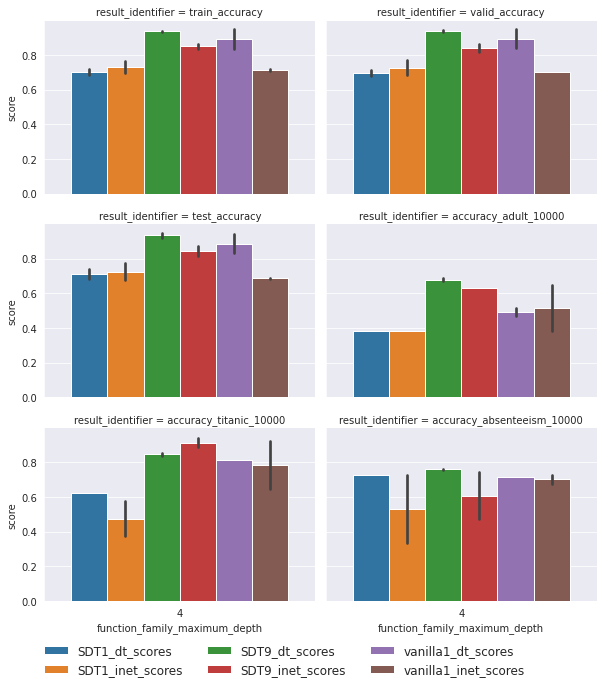

In [16]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    'categorical_indices': '[]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': True, # 'True', 'False'
    #'nas_trials': 20, #20, 100

    'number_of_variables': [9], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [17]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_titanic_10000') &
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) & 
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(10)

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
27,4,1,vanilla,vanilla,5,9,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,True,20,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.648045
32,4,1,vanilla,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,True,60,make_classification,0,vanilla1_inet_scores,accuracy_titanic_10000,0.921788
25,4,1,SDT,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,True,60,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.575419
30,4,1,SDT,vanilla,5,9,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,True,20,make_classification,0,SDT1_inet_scores,accuracy_titanic_10000,0.374302
24,4,9,SDT,vanilla,5,9,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,1,None,True,60,make_classification,0,SDT9_inet_scores,accuracy_titanic_10000,0.888268
34,4,9,SDT,vanilla,5,9,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,1,None,True,60,make_classification,0,SDT9_inet_scores,accuracy_titanic_10000,0.938547


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


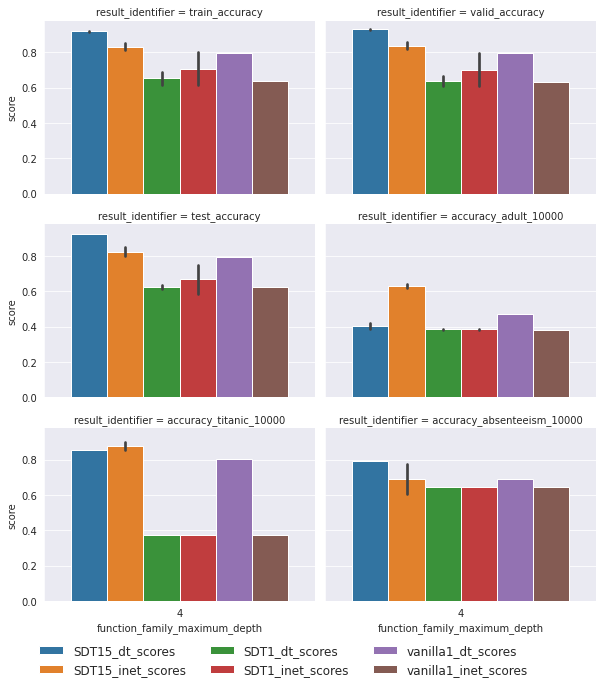

In [18]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    'categorical_indices': '[]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': True, # 'True', 'False'
    #'nas_trials': 20, #20, 100

    'number_of_variables': [15], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [19]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_absenteeism_10000') &
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) & 
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(10)

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
29,4,1,vanilla,vanilla,5,15,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,True,20,make_classification,0,vanilla1_inet_scores,accuracy_absenteeism_10000,0.648649
26,4,1,SDT,vanilla,5,15,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,True,60,make_classification,0,SDT1_inet_scores,accuracy_absenteeism_10000,0.648649
28,4,1,SDT,vanilla,5,15,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,3,None,True,20,make_classification,0,SDT1_inet_scores,accuracy_absenteeism_10000,0.648649
31,4,15,SDT,vanilla,5,15,0,make_classification_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,1,None,True,20,make_classification,0,SDT15_inet_scores,accuracy_absenteeism_10000,0.777027
33,4,15,SDT,vanilla,5,15,0,random_decision_tree_trained,[],[128],adam,"[1024, 1024, 256, 2048, 2048]","[0.3, 0.3, 0.3, 0.3, 0.3]",0.0001,binary_crossentropy,10000,1,None,True,60,make_classification,0,SDT15_inet_scores,accuracy_absenteeism_10000,0.608108
